In [1]:
import dlc_bci as bci
from utility import * 

## Get Data
Fetches the data from the server and saves it to a folder at the root 

In [2]:
train_input, train_target, test_input, test_target = import100HzData()
train_input_1000, train_target_1000, test_input_1000, test_target_1000 = import1000HzData()

<class 'torch.FloatTensor'> torch.Size([316, 28, 50])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 50])
<class 'torch.LongTensor'> torch.Size([100])
<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])


In [5]:
print(train_input.shape) 
print(train_target.shape) 
print(test_input.shape) 
print(test_target.shape) 

torch.Size([316, 28, 50])
torch.Size([316])
torch.Size([100, 28, 50])
torch.Size([100])


## Visualize the data

28


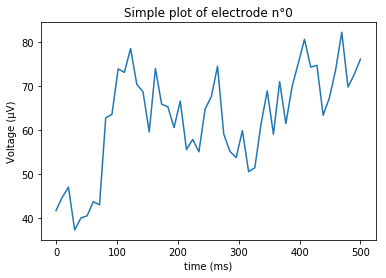

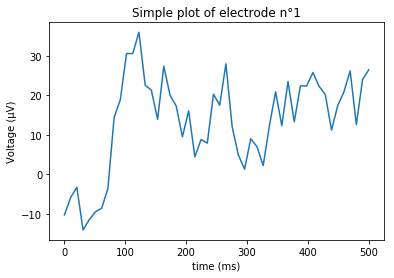

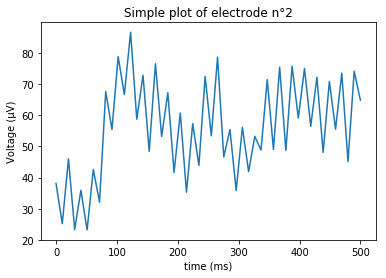

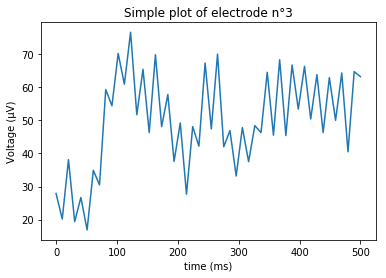

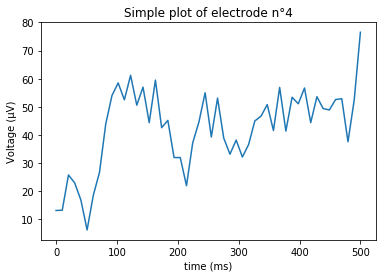

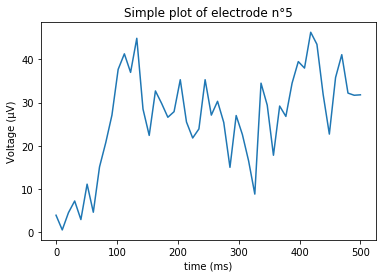

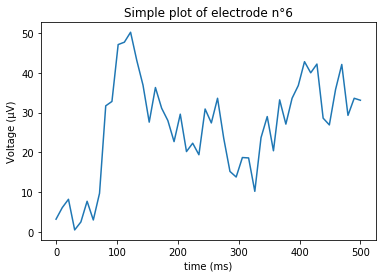

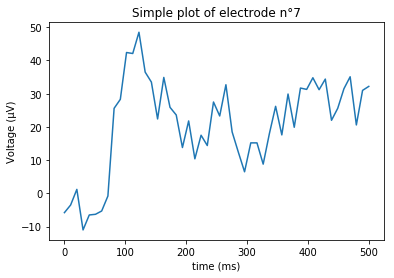

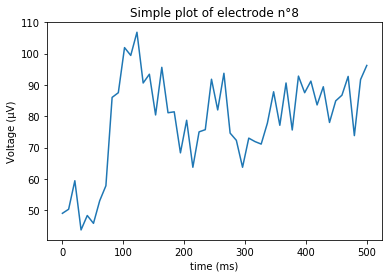

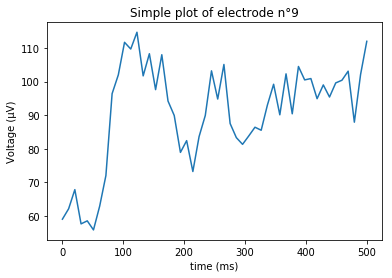

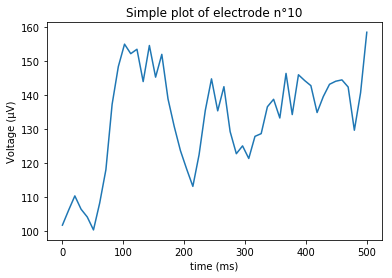

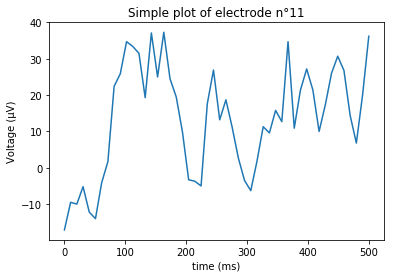

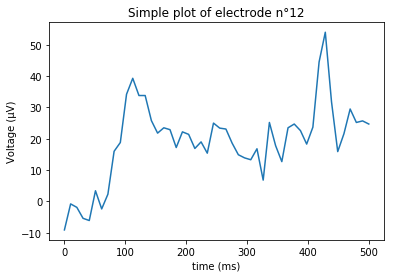

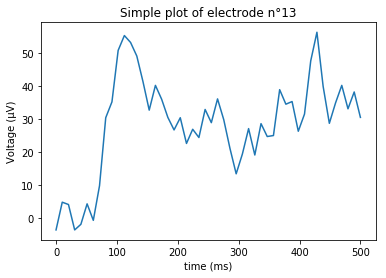

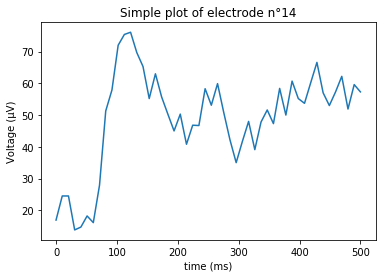

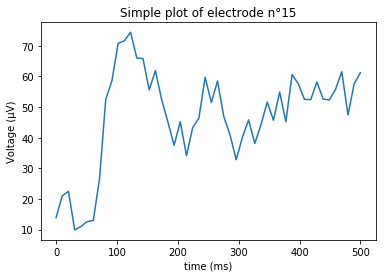

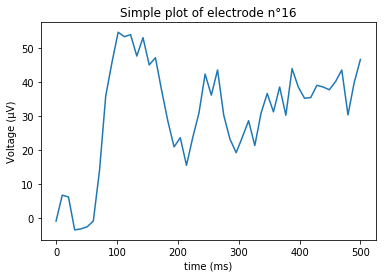

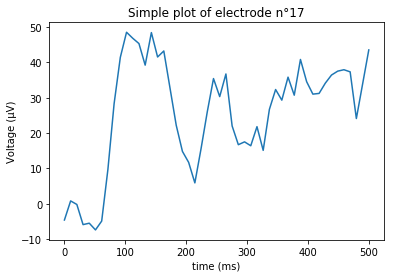

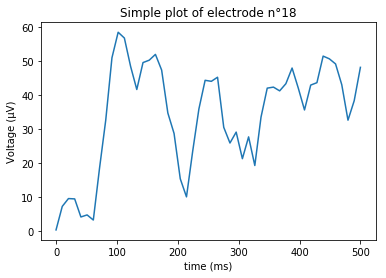

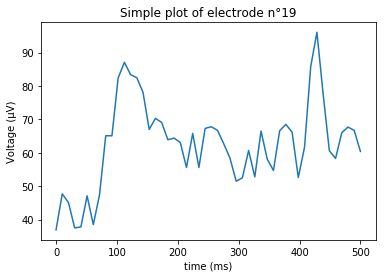

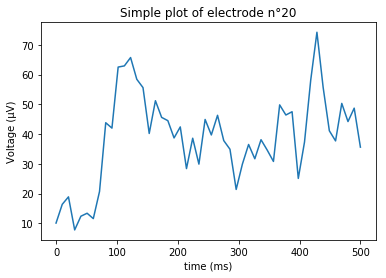

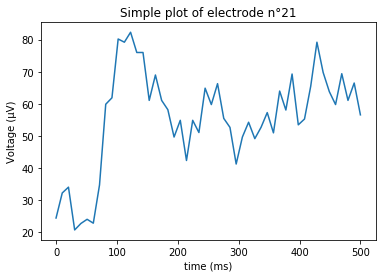

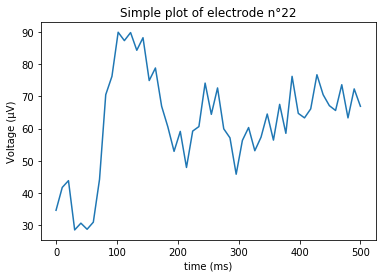

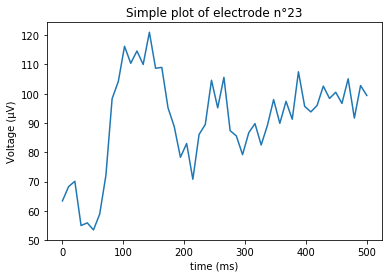

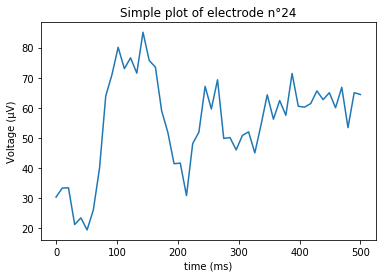

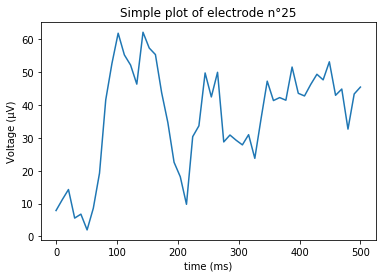

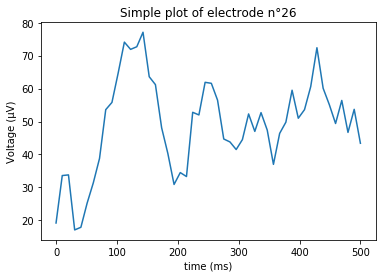

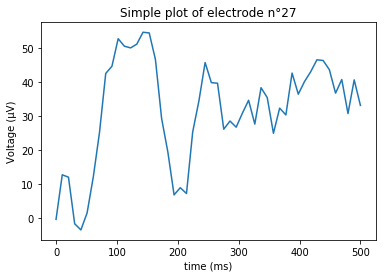

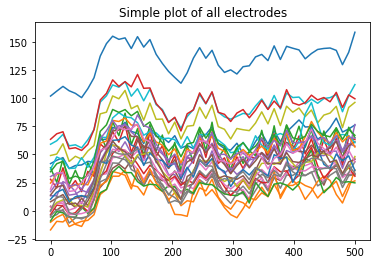

In [41]:
import matplotlib.pyplot as plt
import numpy as np 

inputlen = np.array(train_input[0, :, 0])
print (inputlen.size)

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :] #observing the samples n°1 for all time steps and all the electodes 
    data = np.array(data)
    plt.plot(time, data)
    plt.title('Simple plot of electrode n°' + str(i)) 
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.show() #enables to show all electrodes separately 
    
for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    plt.plot(time, data)
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.title('Simple plot of all electrodes') 

## Noise Removal

Buterworth filter, Moving average (low pass filter)

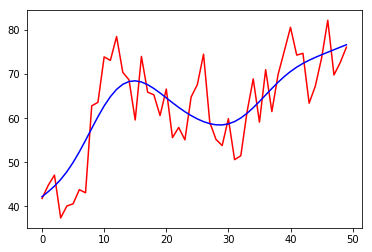

In [46]:
import scipy.signal as signal

#Ref. https://stackoverflow.com/questions/35588782/how-to-average-a-signal-to-remove-noise-with-python

# First, design the Buterworth filter, Moving average (low pass filter) 
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
train_inputA = np.array(train_input[0, 0, :])
smooth_data = signal.filtfilt(B,A, train_inputA)
plt.plot(train_inputA,'r-')
plt.plot(smooth_data,'b-')
plt.show()

Fourier Analysis - Example plot
NOTE: Importance of normalization to keep the magnitude 

In [50]:
import scipy

xs=np.arange(1,100,.01) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal = sin1=np.sin(xs*.3) #(A)
sin1=np.sin(xs) # (B) sin1
sin2=np.sin(xs*2.33)*.333 # (B) sin2
sin3=np.sin(xs*2.77)*.777 # (B) sin3
noise=sin1+sin2+sin3 # (C)
static = (np.random.random_sample((len(xs)))-.5)*.2 # (D)
sigstat=static+signal # (E)
rawsignal=sigstat+noise # (F)
fft=scipy.fft(rawsignal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:
        bp[i]=0
ibp=scipy.ifft(bp) # (I), (J), (K) and (L)

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


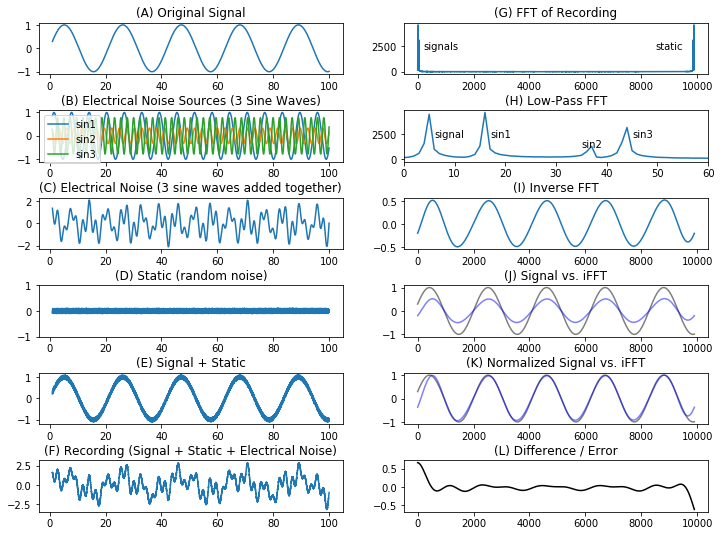

In [54]:
h,w=6,2
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.7)

plt.subplot(h,w,1);
plt.title("(A) Original Signal")
plt.plot(xs,signal)

plt.subplot(h,w,3);
plt.title("(B) Electrical Noise Sources (3 Sine Waves)")
plt.plot(xs,sin1,label="sin1")
plt.plot(xs,sin2,label="sin2")
plt.plot(xs,sin3,label="sin3")
plt.legend()

plt.subplot(h,w,5);
plt.title("(C) Electrical Noise (3 sine waves added together)")
plt.plot(xs,noise)

plt.subplot(h,w,7);
plt.title("(D) Static (random noise)")
plt.plot(xs,static)
plt.axis([None,None,-1,1])

plt.subplot(h,w,9);
plt.title("(E) Signal + Static")
plt.plot(xs,sigstat)

plt.subplot(h,w,11);
plt.title("(F) Recording (Signal + Static + Electrical Noise)")
plt.plot(xs,rawsignal)

plt.subplot(h,w,2);
plt.title("(G) FFT of Recording")
fft=scipy.fft(rawsignal)
plt.plot(abs(fft))
plt.text(200,3000,"signals",verticalalignment='top')
plt.text(9500,3000,"static",verticalalignment='top',
        horizontalalignment='right')

plt.subplot(h,w,4);
plt.title("(H) Low-Pass FFT")
plt.plot(abs(fft))
plt.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
plt.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
plt.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
plt.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
plt.axis([0,60,None,None])

plt.subplot(h,w,6);
plt.title("(I) Inverse FFT")
plt.plot(ibp)

plt.subplot(h,w,8);
plt.title("(J) Signal vs. iFFT")
plt.plot(signal,'k',label="signal",alpha=.5)
plt.plot(ibp,'b',label="ifft",alpha=.5)

plt.subplot(h,w,10);
plt.title("(K) Normalized Signal vs. iFFT")
plt.plot(signal/max(signal),'k',label="signal",alpha=.5)
plt.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

plt.subplot(h,w,12);
plt.title("(L) Difference / Error")
plt.plot(signal/max(signal)-ibp/max(ibp),'k')

plt.savefig("SIG.png",dpi=200)
plt.show()

In [ ]:
Fourier Analysis - Our data 

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


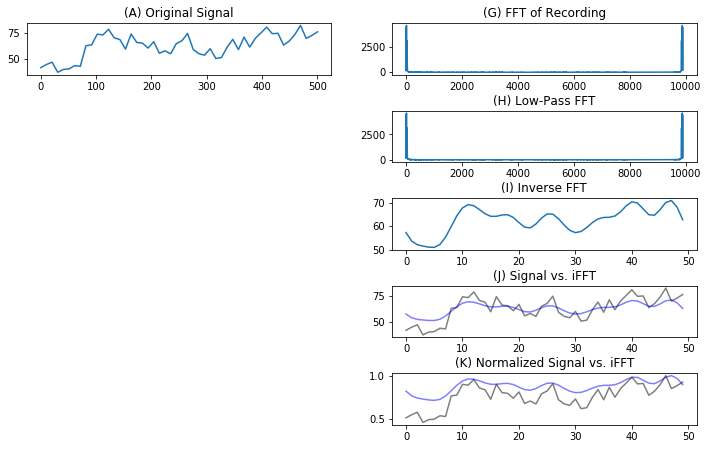

In [55]:
import scipy

xs=np.linspace(0,500,50) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal =  train_inputA = np.array(train_input[0, 0, :]) #(A)
fft=scipy.fft(signal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:
        bp[i]=0
ibp=scipy.ifft(bp) # (I), (J), (K) and (L)

### PLOT 

h,w=6,2
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.7)

plt.subplot(h,w,1);
plt.title("(A) Original Signal")
plt.plot(xs,signal)

plt.subplot(h,w,2);
plt.title("(G) FFT of Recording")
fft=scipy.fft(rawsignal)
plt.plot(abs(fft))

plt.subplot(h,w,4);
plt.title("(H) Low-Pass FFT")
plt.plot(abs(fft))

plt.subplot(h,w,6);
plt.title("(I) Inverse FFT")
plt.plot(ibp)

plt.subplot(h,w,8);
plt.title("(J) Signal vs. iFFT")
plt.plot(signal,'k',label="signal",alpha=.5)
plt.plot(ibp,'b',label="ifft",alpha=.5)

plt.subplot(h,w,10);
plt.title("(K) Normalized Signal vs. iFFT")
plt.plot(signal/max(signal),'k',label="signal",alpha=.5)
plt.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

plt.savefig("SIG.png",dpi=200)
plt.show()

## Feature Extraction 
by FFT for each electrode and each of the 316 samples 

In [64]:
######## TRAINING DATA SET ########   
numberSamples = (np.array(train_input[:, 0, 0])).size
numberElectrodes = (np.array(train_input[0, :, 0])).size

extractedFeatures = np.zeros((numberSamples, numberElectrodes))

#needs to be computationnally optimized by using the operations shown in the exercises 
for i in range (0, numberSamples): 
    for j in range (0, numberElectrodes): 
        signal = np.array(train_input[i, j, :])
        extractedFeatures[i, j]=scipy.fft(signal)
        
######## TEST DATA SET  ########   
numberSamplesTest = (np.array(test_input[0, :, 0])).size
numberElectrodesTest = (np.array(test_input[0, :, 0])).size

extractedFeatures = np.array(numberSamplesTest, numberElectrodesTest)

for i in range numberSamplesTest: #needs to be computationnally optimized by using the operations shown in the exercises 
    for j in range numberElectrodesTest: 
        signalTest = np.array(test_input[i, j, :])
        extractedFeaturesTest[i, j]=scipy.fft(signalTest)

316


ValueError: setting an array element with a sequence.

Naive algorithm by taking the mean signal of the electrodes at each time point

In [69]:
######## TRAINING DATA SET ########   
numberSamples = (np.array(train_input[:, 0, 0])).size
numberElectrodes = (np.array(train_input[0, :, 0])).size
numberTimePoints = (np.array(train_input[0, 0, :])).size

extractedFeatures = np.zeros((numberSamples, numberTimePoints))

#needs to be computationnally optimized by using the operations shown in the exercises 
for i in range (0, numberSamples): 
    for j in range (0, numberTimePoints): 
        signal = np.array(train_input[i, :, j])
        extractedFeatures[i, j]=np.mean(signal)
        
######## TEST DATA SET  ########   
numberSamplesTest = (np.array(test_input[:, 0, 0])).size
numberElectrodesTest = (np.array(test_input[0, :, 0])).size
numberTimePointsTest = (np.array(test_input[0, 0, :])).size

extractedFeaturesTest = np.zeros((numberSamplesTest, numberTimePointsTest))

#needs to be computationnally optimized by using the operations shown in the exercises 
for i in range (numberSamplesTest): 
    for j in range (numberTimePointsTest): 
        signalTest = np.array(test_input[i, :, j])
        extractedFeaturesTest[i, j]= np.mean(signalTest)

## SVM Regression Model 

In [70]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(extractedFeatures, train_target) #train by fitting the data
test_prediction = clf.predict(extractedFeaturesTest) #prediction

## Accuracy 

In [71]:
counter = 0
for i in range (0, len(test_prediction)):
    if test_prediction[i] == test_target[i]: 
        counter = counter + 1 
        
print('Accuracy =' + str(counter/len(test_prediction)))

Accuracy =0.47
